# DSC 2022

https://comp.ita.br/dsc/noticias/22-10-14-abertura/


Fase 1
A primeira etapa basicamente compreende a predição de k = 20 pregões futuros
dos ativos que compõem o índice SP500. O SP500 é um índice formado por 500
grandes empresas listadas em bolsas americanas composto por, curiosamente, 503
ativos. A listagem dos ativos pode ser encontrada, por exemplo, no Wikipedia:
SP500.

[LSTM](https://towardsdatascience.com/pytorch-lstms-for-time-series-data-cd16190929d7)
[Yahoo Finance API](https://algotrading101.com/learn/yahoo-finance-api-guide/)

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import plotly.express as px

pd.options.plotting.backend = "plotly"

In [366]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
df.to_csv('S&P500-Info.csv')
df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])
df = df["Symbol"].drop(df[df["Symbol"] == "TRGP"].index)

In [367]:
# ^GSPC is code for S&P500, see https://finance.yahoo.com/quote/%5EGSPC/
start_date = "2021-06-1"
end_date = "2022-10-21"
data = web.DataReader(name=df.iloc[0], data_source='yahoo', start=start_date, end=end_date)

In [368]:
display(data)
fig = data["Close"].plot(title="", labels=dict(index="Data", value="Preço de Fechamento"))
fig.show()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-01,205.089996,202.550003,204.979996,203.199997,1567300.0,194.143112
2021-06-02,203.970001,202.360001,203.729996,203.289993,1877400.0,194.229095
2021-06-03,204.669998,201.809998,202.500000,203.669998,1902100.0,194.592178
2021-06-04,206.119995,203.770004,204.110001,206.050003,1868600.0,196.866089
2021-06-07,206.809998,203.309998,206.350006,203.729996,1531100.0,194.649475
...,...,...,...,...,...,...
2022-10-17,115.720001,113.290001,115.309998,113.860001,3003500.0,113.860001
2022-10-18,116.400002,114.449997,115.739998,115.949997,2564000.0,115.949997
2022-10-19,115.680000,113.239998,115.099998,114.199997,2578600.0,114.199997


In [372]:
from pmdarima import auto_arima

In [373]:
import matplotlib.pyplot as plt

In [374]:
model_autoARIMA = auto_arima(y=data["Close"], x=data.drop(["Close"], axis=1), start_p=0, start_q=20,
     test='adf',       # use adftest to find optimal 'd'
     max_p=3, max_q=20, min_q=20,
     m=1,              # frequency of series
     d=None,           # let model determine 'd'
     seasonal=False,   # No Seasonality
     start_P=0,
     D=0,
     trace=True,
     error_action='ignore',
     suppress_warnings=True,
     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,20)(0,0,0)[0]             : AIC=inf, Time=2.57 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4604.154, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1600.138, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1602.067, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1601.908, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3698.904, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1599.089, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1601.066, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1600.877, Time=0.24 sec
 

In [375]:
print(model_autoARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  353
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -795.544
Date:                Sun, 23 Oct 2022   AIC                           1599.089
Time:                        20:32:49   BIC                           1614.555
Sample:                             0   HQIC                          1605.243
                                - 353                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2512      0.721      0.348      0.728      -1.162       1.664
ar.L1          0.9984      0.004    226.973      0.000       0.990       1.007
ma.L1         -0.0622      0.054     -1.149      0.2

In [376]:
from pmdarima import ARIMA

df_log = np.log(data)
#split data into train and training set
train_data, test_data = df_log[20:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
# Build Model
ARIMA_model = ARIMA(order=(0,1,20))
fitted = ARIMA_model.fit(x=train_data.drop(["Close"], axis=1), y=train_data["Close"], disp=-1)
print(fitted.summary())

/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/optimizer.py:17: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: x. After release 0.14, this will raise.



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  297
Model:              SARIMAX(0, 1, 20)   Log Likelihood                 846.846
Date:                Sun, 23 Oct 2022   AIC                          -1649.692
Time:                        20:32:54   BIC                          -1568.504
Sample:                             0   HQIC                         -1617.186
                                - 297                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0019      0.002     -1.094      0.274      -0.005       0.002
ma.L1         -0.0466      0.060     -0.783      0.433      -0.163       0.070
ma.L2         -0.0201      0.073     -0.274      0.7

/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



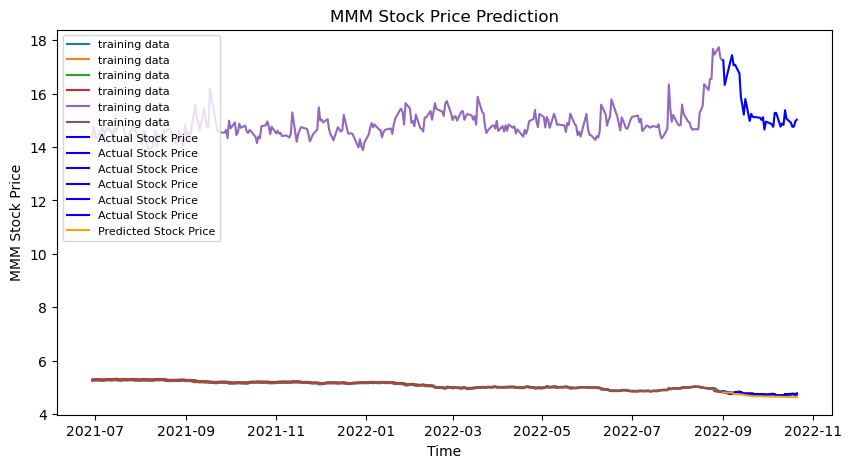

In [377]:
fc = fitted.predict(36, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.title('%s Stock Price Prediction' %df.iloc[0])
plt.xlabel('Time')
plt.ylabel('%s Stock Price' %df.iloc[0])
plt.legend(loc='upper left', fontsize=8)

plt.show()

In [390]:
predictions = []

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-01,292.070007,288.809998,291.519989,289.839996,3335800,289.839996
2021-06-02,290.899994,289.220001,290.850006,290.019989,3517100,290.019989
2021-06-03,293.269989,288.279999,288.359985,291.970001,4099400,291.970001
2021-06-04,293.079987,291.450012,292.910004,292.519989,3271100,292.519989
2021-06-07,292.579987,288.839996,292.559998,289.459991,4441000,289.459991
...,...,...,...,...,...,...
2022-10-17,278.589996,275.299988,276.480011,277.019989,4452100,277.019989
2022-10-18,283.359985,279.250000,282.739990,281.670013,4292700,281.670013
2022-10-19,282.380005,276.970001,280.329987,278.339996,3213700,278.339996


In [396]:
for stock in df.replace('\.','-', regex=True).iloc[64:]:
     data = web.DataReader(name=stock, data_source='yahoo', start=start_date, end=end_date)
     data.index = pd.DatetimeIndex(data.index).to_period('D')

     data_log = np.log(data)
     #split data into train and training set
     train_data, test_data = data_log[20:int(len(data_log)*0.9)], data_log[int(len(data_log)*0.9):]
     # Build Model
     ARIMA_model = ARIMA(order=(0,1,20))
     fitted = ARIMA_model.fit(X=train_data.drop(["Close"], axis=1), y=train_data["Close"], disp=-1)

     predictions.append(
          np.exp(fitted.predict(n_periods=20, X=data_log.iloc[-20:].drop(["Close"], axis=1)))
     )

     print(stock)

/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



BRK-B
BBY


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



BIO
TECH


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



BIIB
BLK


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



BK


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



BA


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



BKNG
BWA
BXP


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



BSX
BMY
AVGO


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



BR
BRO
BF-B
CHRW


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CDNS


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CZR
CPT
CPB
COF
CAH


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



KMX


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CCL
CARR


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CTLT
CAT


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CBOE


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CBRE


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CDW
CE


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CNC


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CNP


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CDAY
CF


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CRL


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SCHW


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CHTR


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CVX


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CMG
CB
CHD
CI


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CINF
CTAS
CSCO
C


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CFG
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CEG
COO


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CPRT
GLW


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CTVA


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CSGP
COST
CTRA
CCI


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CSX
CMI
CVS
DHI
DHR
DRI


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



DVA
DE


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



DAL
XRAY
DVN


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



DXCM
FANG
DLR
DFS


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



DISH


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



DIS
DG


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



DLTR
D
DPZ
DOV


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



DOW


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



DTE
DUK
DD


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



DXC
EMN


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ETN
EBAY
ECL
EIX


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



EW


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



EA
ELV
LLY
EMR


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ENPH
ETR
EOG


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



EPAM
EQT
EFX
EQIX
EQR
ESS
EL


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ETSY
RE


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



EVRG
ES
EXC


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



EXPE
EXPD
EXR
XOM


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



FFIV
FDS


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



FAST
FRT


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



FDX
FITB
FRC
FE
FIS


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



FISV


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



FLT


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



FMC
F


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GRMN


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



IT


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



GNRC
GD


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



GE
GIS


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



GM
GPC


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



GILD
GL
GPN
GS
HAL
HIG
HAS
HCA


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



PEAK


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



HSIC
HSY
HES
HPE
HLT


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



HOLX
HD
HON
HRL
HST


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



HWM
HPQ
HUM


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



HBAN
HII
IBM


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



IEX


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



IDXX
ITW


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ILMN


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



INCY


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



IR
INTC
ICE
IP
IPG
IFF
INTU


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ISRG
IVZ
INVH


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



IQV


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



IRM
JBHT
JKHY
J
JNJ
JCI
JPM


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



JNPR
K


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



KDP
KEY


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



KEYS


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



KMB
KIM
KMI
KLAC


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



KHC
KR
LHX


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



LH


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



LRCX


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



LW


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



LVS
LDOS
LEN
LNC
LIN


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



LYV
LKQ
LMT


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



L
LOW
LUMN
LYB


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



MTB
MRO
MPC
MKTX
MAR
MMC
MLM
MAS


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



MA


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



MTCH
MKC


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



MCD
MCK
MDT
MRK


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



META
MET


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



MTD


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



MGM


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



MCHP
MU
MSFT
MAA


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



MRNA


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



MHK


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



MOH
TAP
MDLZ
MPWR


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



MNST
MCO


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



MS
MOS
MSI


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



MSCI
NDAQ
NTAP


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



NFLX
NWL
NEM


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



NWSA


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



NWS
NEE
NKE
NI
NDSN
NSC
NTRS
NOC


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



NLOK


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



NCLH


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



NRG
NUE


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



NVDA


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



NVR
NXPI


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ORLY
OXY
ODFL
OMC


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ON


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



OKE


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ORCL
OGN
OTIS


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



PCAR
PKG
PARA
PH


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



PAYX


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



PAYC


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



PYPL
PNR
PEP
PKI
PFE


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



PCG
PM
PSX


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



PNW
PXD


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



PNC
POOL


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



PPG


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



PPL
PFG
PG
PGR


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



PLD
PRU
PEG


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



PTC
PSA
PHM


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



QRVO


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



PWR
QCOM
DGX
RL
RJF
RTX


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



O
REG


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



REGN
RF


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RSG
RMD
RHI


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ROK


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ROL


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ROP
ROST


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RCL


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SPGI


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CRM
SBAC
SLB
STX


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SEE
SRE


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



NOW
SHW
SBNY
SPG
SWKS


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SJM
SNA


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SEDG


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SO


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



LUV
SWK
SBUX


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



STT


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



STE


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SYK


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SIVB
SYF


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SNPS
SYY


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



TMUS


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



TROW


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



TTWO
TPR


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



TGT
TEL


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



TDY
TFX
TER


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



TSLA
TXN


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



TXT


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



TMO
TJX
TSCO
TT
TDG
TRV


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



TRMB
TFC


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



TWTR


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



TYL
TSN
USB
UDR


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ULTA
UNP


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



UAL
UPS


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



URI
UNH
UHS
VLO


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



VTR


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



VRSN
VRSK
VZ


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



VRTX
VFC
VTRS
VICI
V


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



VNO
VMC
WAB
WBA
WMT


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



WBD


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



WM


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



WAT


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



WEC


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



WFC
WELL
WST


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



WDC
WRK


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



WY
WHR
WMB


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



WTW
GWW


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



WYNN


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



XEL
XYL


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



YUM


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ZBRA
ZBH
ZION
ZTS


/home/rzimmerdev/conda/envs/finance/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [397]:
len(predictions)

502

In [401]:
result = pd.DataFrame(predictions).T

In [407]:
result.columns = df.values

In [408]:
result

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,112.865107,49.451221,99.814241,141.235743,242.489165,257.528250,74.328408,81.520732,276.958861,229.571755,...,203.494841,489.183367,66.799655,70.335525,88.888791,109.150615,265.859036,105.144211,53.524775,148.602344
1,112.258527,49.351257,98.298700,141.781369,244.398188,256.312289,74.855177,80.825461,277.567827,228.525366,...,203.505528,486.938847,66.559433,68.716869,88.359789,107.739938,264.948044,104.809818,52.753207,149.402784
2,114.117431,50.463317,98.668520,144.574169,250.047174,261.874573,75.381631,82.913378,281.396744,232.845667,...,206.841492,493.600314,66.759205,69.240716,90.572699,108.117942,271.347006,107.513787,53.264709,152.253101
3,112.086314,48.749079,98.231646,142.676220,248.956184,258.198204,74.859949,80.614811,278.245727,228.613361,...,203.003160,486.661599,64.349003,65.644629,88.086083,107.216591,265.516022,107.336004,51.770060,150.943694
4,110.256138,48.600901,96.697771,134.083772,245.655287,257.216040,74.328652,80.458647,275.194755,227.004241,...,201.647671,488.917207,63.028777,64.237133,87.354136,106.329801,262.005094,104.757580,50.860005,148.276947
5,112.983496,50.630785,99.438678,138.082840,255.144107,264.779376,74.347754,83.030724,285.233482,233.080341,...,207.376267,506.517963,64.608503,65.776665,90.193256,109.107640,272.083877,107.527123,52.188447,151.332414
6,115.510381,52.354320,102.996278,141.755546,264.003027,274.164575,74.983766,85.694106,294.962130,237.455525,...,213.831685,520.941398,70.738077,66.714525,93.133836,111.405661,281.642585,111.896304,54.516435,154.727266
7,115.052772,51.500440,103.294026,143.136559,264.252018,274.184385,74.092367,86.264669,297.370972,239.876731,...,213.388342,518.460860,72.177775,64.540604,92.653709,112.334279,281.871512,112.689809,53.518978,154.561024
8,110.980423,50.781964,102.356718,140.060679,267.200837,269.302317,73.811380,85.751471,298.399768,235.685145,...,211.310843,509.268817,74.167428,61.987199,91.653554,110.109101,280.340506,110.794917,52.421774,152.558113
9,107.368069,49.494298,101.693774,138.458230,257.080277,259.535286,73.329590,85.431518,288.759026,227.848311,...,205.588881,500.519263,73.087191,59.980900,89.261247,108.936907,266.669942,108.444738,50.384621,147.338559


In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# report performance
mse = mean_squared_error(test_data["Close"], fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data["Close"], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data["Close"], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data["Close"])/np.abs(test_data["Close"]))
print('MAPE: '+str(mape))

In [ ]:
data.iloc[-30:]

In [ ]:
model = LSTM()
criterion = nn.MSELoss()
optimiser = optim.LBFGS(model.parameters(), lr=0.08)

In [ ]:
# data = data.reset_index()

In [ ]:
lag_features = ["High", "Low", "Volume"]
df_rolled_7d = data[lag_features].rolling(window=20, min_periods=0)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)

In [ ]:
# size = len(data["Close"])
# interval = np.random.randint(size - 20)
# data["Close"][interval:interval + 21]

In [ ]:
# data["Day"] = data["Date"].dt.day
# data["Weekday"] = data["Date"].dt.dayofweek
# data["Month"] = data["Date"].dt.month
# data["Year"] = data["Date"].dt.year

In [ ]:
# data = data.drop(['Date'], axis=1)

In [ ]:
# data

In [ ]:
# from sklearn.preprocessing import FunctionTransformer
# from sklearn import preprocessing
#
# min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
# def sin_transformer(period):
# 	return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))
#
# def cos_transformer(period):
# 	return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [ ]:
# def transform(var, value):
# 	data[var + "_cos"] = cos_transformer(value).fit_transform(data)[var]
# 	data[var + "_sin"] = sin_transformer(value).fit_transform(data)[var]

In [ ]:
# transform("Day", 31)
# transform("Weekday", 4)
# transform("Month", 12)
# data = data.drop(["Day", "Weekday", "Month"], axis=1)

In [ ]:
# min_max_scaler.fit_transform(data)